In [16]:
import pandas as pd
import re
import spacy
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
gossipcop_real = pd.read_csv('dataset/gossipcop_real.csv')
gossipcop_fake = pd.read_csv('dataset/gossipcop_fake.csv')
politifact_fake = pd.read_csv('dataset/politifact_fake.csv')
politifact_real = pd.read_csv('dataset/politifact_real.csv')

In [18]:
for i in [gossipcop_fake, gossipcop_real, politifact_fake, politifact_real]:
    print(i.isnull().sum())

id             0
news_url     256
title          0
tweet_ids    188
dtype: int64
id              0
news_url       13
title           0
tweet_ids    1058
dtype: int64
id            0
news_url      4
title         0
tweet_ids    40
dtype: int64
id             0
news_url      57
title          0
tweet_ids    215
dtype: int64


In [19]:
#cleaning title data
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Normalize text
    return text


In [20]:
gossipcop_real['cleaned_title'] = gossipcop_real['title'].apply(clean_text)
gossipcop_fake['cleaned_title'] = gossipcop_fake['title'].apply(clean_text)
politifact_fake['cleaned_title'] = politifact_fake['title'].apply(clean_text)
politifact_real['cleaned_title'] = politifact_real['title'].apply(clean_text)

In [36]:
# Use SpaCy to extract named entities
nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    entities = {'PERSON': 0, 'ORG': 0, 'GPE': 0} 
    for ent in doc.ents:
        if ent.label_ in entities.keys():
            entities[ent.label_] += 1
    return entities


In [37]:
gossipcop_real['entities'] = gossipcop_real['cleaned_title'].apply(extract_entities)
gossipcop_fake['entities'] = gossipcop_fake['cleaned_title'].apply(extract_entities)
politifact_real['entities'] = politifact_real['cleaned_title'].apply(extract_entities)
politifact_fake['entities'] = politifact_fake['cleaned_title'].apply(extract_entities)

In [38]:
# Feature Engineering
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def entity_counts(entity_dict, entity_type):
    return entity_dict.get(entity_type, 0)


In [39]:
# gossipcop_real analysis
gossipcop_real['sentiment'] = gossipcop_real['cleaned_title'].apply(get_sentiment)
gossipcop_real['org_count'] = gossipcop_real['entities'].apply(lambda x: entity_counts(x, 'ORG'))
gossipcop_real['person_count'] = gossipcop_real['entities'].apply(lambda x: entity_counts(x, 'PERSON'))
gossipcop_real['gpe_count'] = gossipcop_real['entities'].apply(lambda x: entity_counts(x, 'GPE'))

In [40]:
gossipcop_real.head()

,id,news_url,title,tweet_ids,cleaned_title,entities,sentiment,org_count,person_count,gpe_count
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...,teen mom star jenelle evans wedding dress is a...,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.2,0,1,0
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...,kylie jenner refusing to discuss tyga on life ...,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.0,0,1,0
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...,quinn perkins,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.0,0,0,0
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...,i tried kim kardashians butt workout am forev...,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.0,0,1,0
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...,celine dion donates concert proceeds to vegas ...,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.0,0,0,0


In [41]:
# gossipcop_fake analysis
gossipcop_fake['sentiment'] = gossipcop_fake['cleaned_title'].apply(get_sentiment)
gossipcop_fake['org_count'] = gossipcop_fake['entities'].apply(lambda x: entity_counts(x, 'ORG'))
gossipcop_fake['person_count'] = gossipcop_fake['entities'].apply(lambda x: entity_counts(x, 'PERSON'))
gossipcop_fake['gpe_count'] = gossipcop_fake['entities'].apply(lambda x: entity_counts(x, 'GPE'))

In [42]:
gossipcop_fake.head()

,id,news_url,title,tweet_ids,cleaned_title,entities,sentiment,org_count,person_count,gpe_count
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,did miley cyrus and liam hemsworth secretly ge...,"{'PERSON': 1, 'ORG': 1, 'GPE': 0}",-0.075,1,1,0
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,paris jackson cara delevingne enjoy night out...,"{'PERSON': 0, 'ORG': 0, 'GPE': 1}",0.500,0,0,1
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,celebrities join tax march in protest of donal...,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.000,0,1,0
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,cindy crawfords daughter kaia gerber wears a w...,"{'PERSON': 2, 'ORG': 0, 'GPE': 0}",0.000,0,2,0
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,full list of 2018 oscar nominations variety,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.350,0,0,0


In [43]:
# politifact_fake analysis
politifact_fake['sentiment'] = politifact_fake['cleaned_title'].apply(get_sentiment)
politifact_fake['org_count'] = politifact_fake['entities'].apply(lambda x: entity_counts(x, 'ORG'))
politifact_fake['person_count'] = politifact_fake['entities'].apply(lambda x: entity_counts(x, 'PERSON'))
politifact_fake['gpe_count'] = politifact_fake['entities'].apply(lambda x: entity_counts(x, 'GPE'))

In [44]:
politifact_fake.head()

,id,news_url,title,tweet_ids,cleaned_title,entities,sentiment,org_count,person_count,gpe_count
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,breaking first nfl team declares bankruptcy ov...,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.250000,0,0,0
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,court orders obama to pay 400 million in resti...,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.000000,0,0,0
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,update second roy moore accuser works for mich...,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.142857,0,0,0
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,oscar pistorius attempts to commit suicide,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.000000,0,1,0
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,trump votes for death penalty for being gay,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.416667,0,0,0


In [45]:
# politifact_real analysis
politifact_real['sentiment'] = politifact_real['cleaned_title'].apply(get_sentiment)
politifact_real['org_count'] = politifact_real['entities'].apply(lambda x: entity_counts(x, 'ORG'))
politifact_real['person_count'] = politifact_real['entities'].apply(lambda x: entity_counts(x, 'PERSON'))
politifact_real['gpe_count'] = politifact_real['entities'].apply(lambda x: entity_counts(x, 'GPE'))

In [46]:
politifact_real.head()

,id,news_url,title,tweet_ids,cleaned_title,entities,sentiment,org_count,person_count,gpe_count
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...,national federation of independent business,"{'PERSON': 0, 'ORG': 1, 'GPE': 0}",0.0,1,0,0
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...,comments in fayetteville nc,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.0,0,0,0
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN,romney makes pitch hoping to close deal elect...,"{'PERSON': 0, 'ORG': 1, 'GPE': 0}",0.0,1,0,0
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN,democratic leaders say house democrats are uni...,"{'PERSON': 0, 'ORG': 3, 'GPE': 0}",0.0,3,0,0
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...,budget of the united states government fy 2008,"{'PERSON': 0, 'ORG': 0, 'GPE': 1}",0.0,0,0,1


In [47]:
# popularity analysis
gossipcop_real['tweet_count'] = gossipcop_real['tweet_ids'].apply(lambda x: len(x.split('\t')) if pd.notnull(x) else 0)
gossipcop_fake['tweet_count'] = gossipcop_fake['tweet_ids'].apply(lambda x: len(x.split('\t')) if pd.notnull(x) else 0)
politifact_real['tweet_count'] = politifact_real['tweet_ids'].apply(lambda x: len(x.split('\t')) if pd.notnull(x) else 0)
politifact_fake['tweet_count'] = politifact_fake['tweet_ids'].apply(lambda x: len(x.split('\t')) if pd.notnull(x) else 0)

In [48]:
gossipcop_fake.head()

,id,news_url,title,tweet_ids,cleaned_title,entities,sentiment,org_count,person_count,gpe_count,tweet_count
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,did miley cyrus and liam hemsworth secretly ge...,"{'PERSON': 1, 'ORG': 1, 'GPE': 0}",-0.075,1,1,0,97
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,paris jackson cara delevingne enjoy night out...,"{'PERSON': 0, 'ORG': 0, 'GPE': 1}",0.500,0,0,1,15
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,celebrities join tax march in protest of donal...,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.000,0,1,0,86
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,cindy crawfords daughter kaia gerber wears a w...,"{'PERSON': 2, 'ORG': 0, 'GPE': 0}",0.000,0,2,0,14
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,full list of 2018 oscar nominations variety,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.350,0,0,0,66


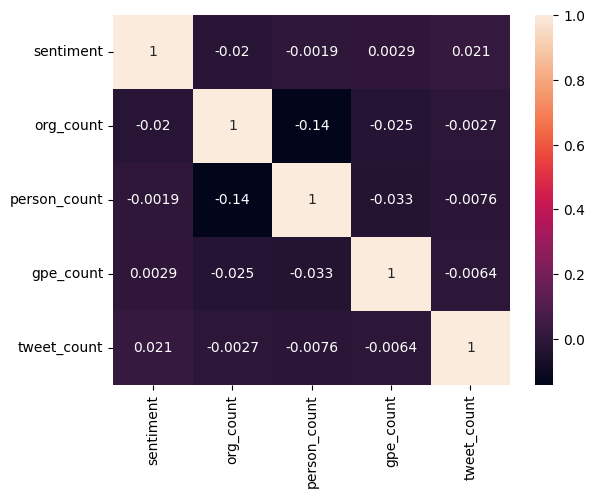

In [50]:
# correlation analysis

sns.heatmap(gossipcop_real[['sentiment', 'org_count', 'person_count', 'gpe_count', 'tweet_count']].corr(), annot=True)
plt.show()


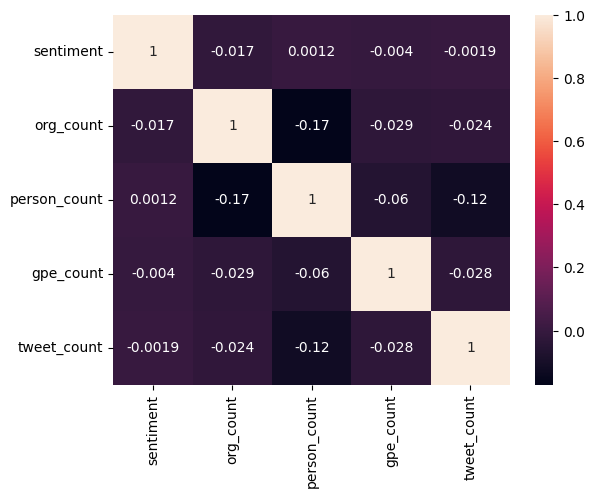

In [51]:
sns.heatmap(gossipcop_fake[['sentiment', 'org_count', 'person_count', 'gpe_count', 'tweet_count']].corr(), annot=True)
plt.show()


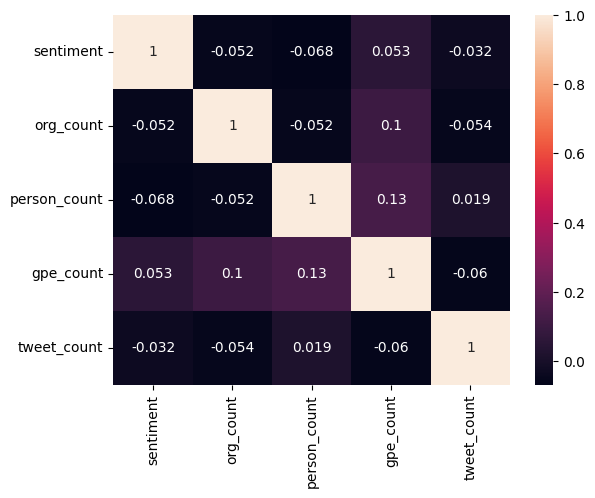

In [52]:
sns.heatmap(politifact_real[['sentiment', 'org_count', 'person_count', 'gpe_count', 'tweet_count']].corr(), annot=True)
plt.show()

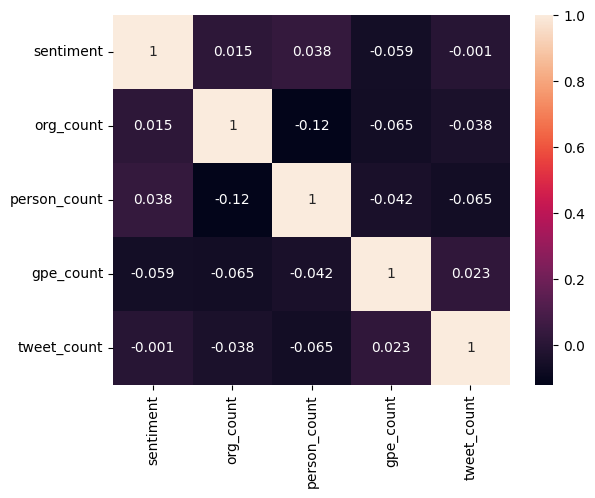

In [53]:
sns.heatmap(politifact_fake[['sentiment', 'org_count', 'person_count', 'gpe_count', 'tweet_count']].corr(), annot=True)
plt.show()

In [54]:
# combine real and fake news datasets
gossipcop_real['label'] = 'real'
politifact_fake['label'] = 'fake'
gossipcop_fake['label'] = 'fake'
politifact_real['label'] = 'real'

combined_data = pd.concat([gossipcop_real, gossipcop_fake, politifact_real, politifact_fake], ignore_index=True)


In [55]:
combined_data

,id,news_url,title,tweet_ids,cleaned_title,entities,sentiment,org_count,person_count,gpe_count,tweet_count,label
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...,teen mom star jenelle evans wedding dress is a...,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.20,0,1,0,67,real
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...,kylie jenner refusing to discuss tyga on life ...,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.00,0,1,0,51,real
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...,quinn perkins,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.00,0,0,0,48,real
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...,i tried kim kardashians butt workout am forev...,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.00,0,1,0,53,real
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...,celine dion donates concert proceeds to vegas ...,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.00,0,0,0,291,real
...,...,...,...,...,...,...,...,...,...,...,...,...
23191,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...,who is affected by the government shutdown,"{'PERSON': 0, 'ORG': 0, 'GPE': 0}",0.00,0,0,0,3,fake
23192,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...,lindsey graham threatens to convert to democra...,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.35,0,1,0,238,fake
23193,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...,electoral college elector commits suicide to a...,"{'PERSON': 1, 'ORG': 0, 'GPE': 0}",0.00,0,1,0,31,fake
23194,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...,sarah palin calls to boycott mall of america b...,"{'PERSON': 1, 'ORG': 0, 'GPE': 2}",0.00,0,1,2,84,fake


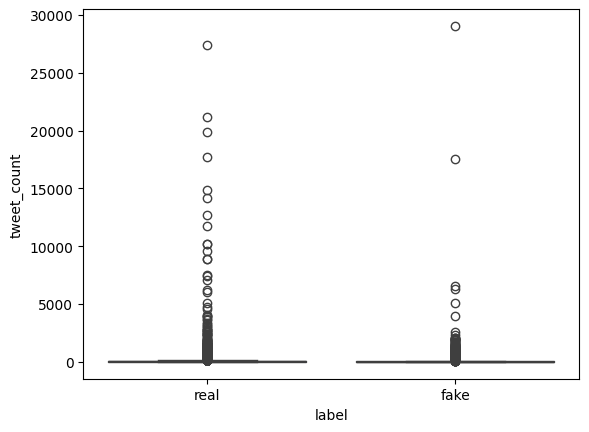

In [56]:
# visualize the distribution of the labels and differences

sns.boxplot(x='label', y='tweet_count', data=combined_data)
plt.show()


In [57]:
combined_data.to_csv('final_dataset.csv', index=False)